---
# **TRANSFERENCIA DE CIRCUITO ELÉCTRICO**

Obtención de las impedancias de cada componente y agrupando.

In [1]:
from circuitanalysis import symbolic as sym

# Declarar la variable simbólica s
ZC1 = sym.Zcapacitor(2)
ZC2 = sym.Zcapacitor()
ZL = sym.Zinductor(1/2)

ZB = sym.paralelo(ZC2, 1)
VO = ZB/(ZB+ZC1+ZL)

sym.print_latex(VO)

<IPython.core.display.Math object>

---
# **GRÁFICO DE BODE Y POLOS Y CEROS**

Mediante la transferencia simbólica y el pasaje de coeficientes.

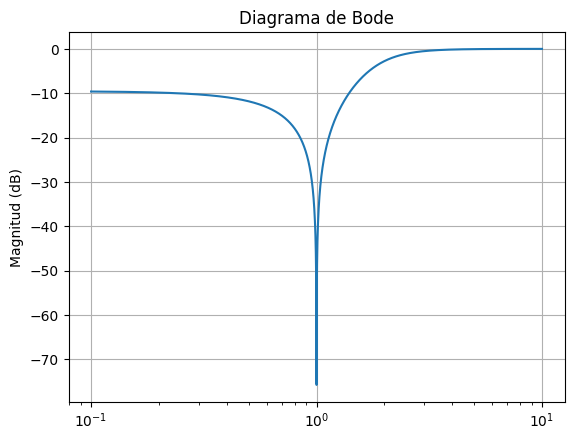

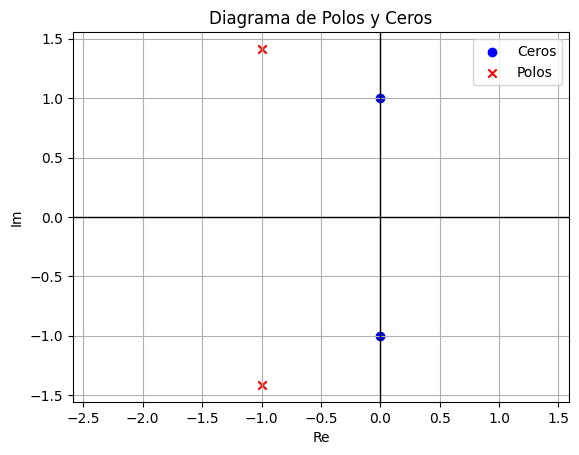

d:\maste\Escritorio\python_libs\.venv\Lib\site-packages\scipy\signal\_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


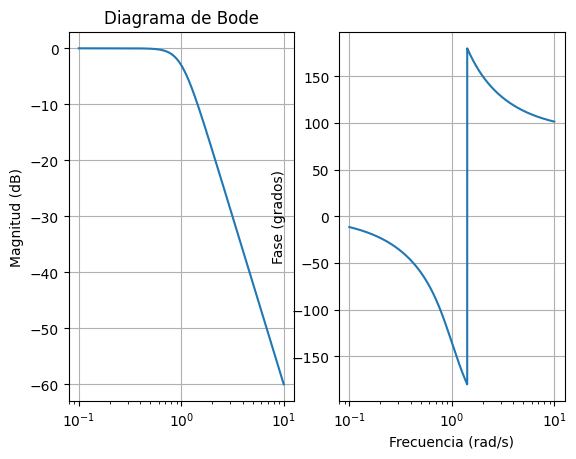

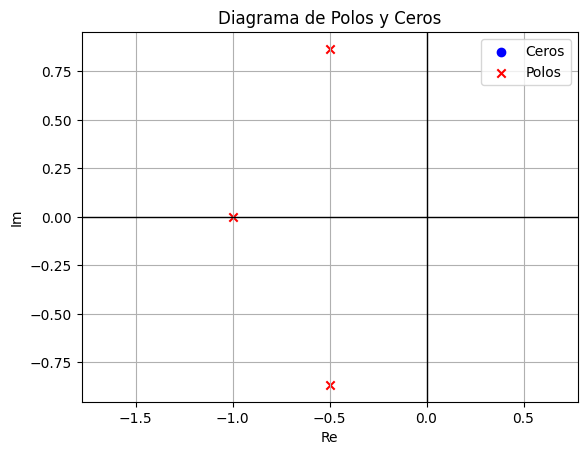

(array([], dtype=float64),
 array([-1. +0.j       , -0.5+0.8660254j, -0.5-0.8660254j]))

In [2]:
from circuitanalysis import graphic as graph
from circuitanalysis import symbolic as sym

# Impresión de bode utilizando Función simbolica
H = sym.TransferFunction(sym.S**2 + 1, sym.S**2+2*sym.S+3)
_ = graph.bodeMagnitude(H)
graph.pole_zero_plot(H)

# Impresión de bode utilizando Función numérica de coeficientes
num = [0, 0, 0, 1]  # Coeficientes del numerador
den = [1, 2, 2, 1]  # Coeficientes del denominador

H = sym.TransferFunction(num, den)
_ = graph.bode(H)
graph.pole_zero_plot(H)

---
# **UTILIZACIÓN DE FFT**

Ejemplo utilizando la fft para un análisis de muestras.
Se aplica una ventana y se obtiene la FFT de una señal senoidal + continua (teóricamente muestreada).

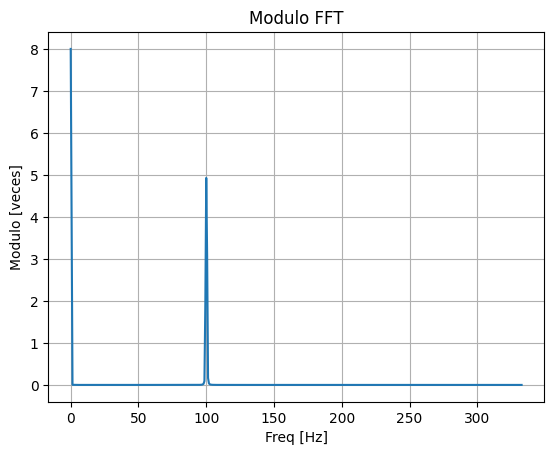

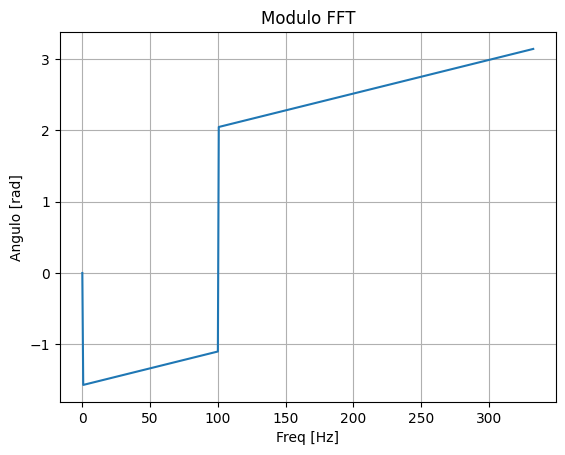

In [3]:
from circuitanalysis import fft_analisys as fft
from circuitanalysis import graphic as graph
import numpy as np

# Creación de la función
TiempoMax = 1.5
CantMuestras = 1000
fs = CantMuestras/TiempoMax
t = np.linspace(0, TiempoMax , CantMuestras)
seno = 5* np.sin(2*np.pi * 100 * t) + 8

# Obtención de la FFT
fft_seno , freq = fft.FFTabs(seno,fs,'hann')
fft_seno_ang , freq1 = fft.FFTangle(seno,fs)

# Gráfico de la FFT
graph.plot(freq , fft_seno,'Modulo FFT', 'Freq [Hz]', 'Modulo [veces]', True)
graph.plot(freq , fft_seno_ang,'Modulo FFT', 'Freq [Hz]', 'Angulo [rad]', True)

---
# **GRÁFICO DE TRANSFORMADA Z**

Se realiza el gráfico de magnitud de una función transferencia en el dominio de Z.
útil para trabajar funciones conocidas discretas que no sean muestras tomadas (como en fft).

<IPython.core.display.Math object>

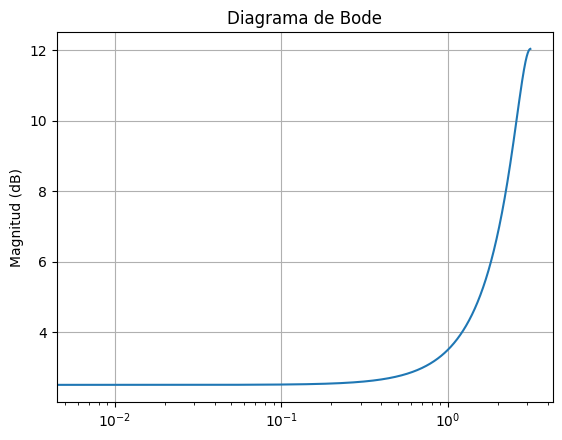

In [4]:
from circuitanalysis import graphic as graph
from circuitanalysis import symbolic as sym

num = [0,4,8]
den = [4,4,1]
H = sym.TransferFunction(num, den)

H_z = sym.to_symbolic_transfer(H, sym.Z)		# Para verlo de forma simbolica
sym.print_latex(H_z)

_ = graph.ZbodeMagnitude(H)